In [28]:
# Import packages
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scarlet

import kuaizi as kz
from kuaizi.display import display_single, SEG_CMAP

import sep
import pickle

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column
from astropy.coordinates import SkyCoord
#from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

plt.rcParams['font.size'] = 15
plt.rc('image', cmap='inferno', interpolation='none', origin='lower')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download image

I incorporate some often-used functions in a package: https://github.com/AstroJacobLi/stardenburdenhardenbart

In [29]:
from kuaizi.detection import Data
kz.utils.set_env(project='HSC', name='HSC_LSBG')
# kz.utils.set_matplotlib(usetex=False, fontsize=15)

## Initialize `unagi`
from unagi import hsc, config
from unagi import plotting
from unagi.task import hsc_cutout, hsc_psf

s18a = hsc.Hsc(dr='dr2', rerun='s18a_wide')

# Get table list from /Users/jiaxuanli/Research/Packages/unagi/unagi/data/s18a_wide/s18a_wide_tables.fits


In [30]:
from kuaizi.fitting import fitting_wavelet_observation

In [31]:
lsbg_cat = Table.read('./Catalog/LSB-Greco2018.fits')
# lsbg_cat = Table.read('./Catalog/lsbg-search-examples.csv', format='csv')

In [6]:
lsbg_cat[24]

<Row index=24>
  UV    Seq   RAJ2000  DEJ2000       iSB          e_iSB       imag   e_imag   g-r     g-i     Reff   e_Reff    n      e_n     Ell    e_Ell     Ag      Ar      Ai   recno
                deg      deg    mag / arcsec2 mag / arcsec2   mag     mag     mag     mag    arcsec  arcsec                                   mag     mag     mag        
bytes1 int32  float64  float64     float64       float64    float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 int32
------ ----- --------- -------- ------------- ------------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- -----
     *    25 244.83857 42.25044         23.65           0.4   19.44    0.24    0.33    0.46    5.09    0.79    1.08    0.31    0.04    0.03   0.038   0.027   0.019    25

# Will dgenerate cutouts for a list of filters: ['g', 'r', 'i', 'z']
# Read in saved FITS file: ./Images/LSBG_0006_img_g.fits
# Read in saved FITS file: ./Images/LSBG_0006_img_r.fits
# Read in saved FITS file: ./Images/LSBG_0006_img_i.fits
# Read in saved FITS file: ./Images/LSBG_0006_img_z.fits
# Will dgenerate cutouts for a list of filters: ['g', 'r', 'i', 'z']
# Read in saved FITS file: ./PSFs/LSBG_0006_psf_g.fits
# Read in saved FITS file: ./PSFs/LSBG_0006_psf_r.fits
# Read in saved FITS file: ./PSFs/LSBG_0006_psf_i.fits
# Read in saved FITS file: ./PSFs/LSBG_0006_psf_z.fits
# Query GAIA stars...
# 12 stars from GAIA are masked!
# Detected 240 objects
# 12 stars from GAIA are masked!
# Detected 279 objects
# Detected 120 objects
# min_grad = -0.30, contam_ratio = 0.02. starlet_thresh = 2.00.
  - Succeed for e_rel = 1e-4 with 19 iterations! Try higher accuracy!
  - Succeed for e_rel = 1e-06 with 68 iterations! Try higher accuracy!
Scarlet ran for 68 iterations to logL = 1962833.2769

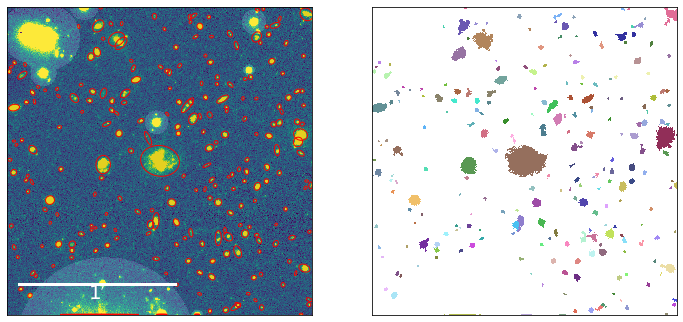

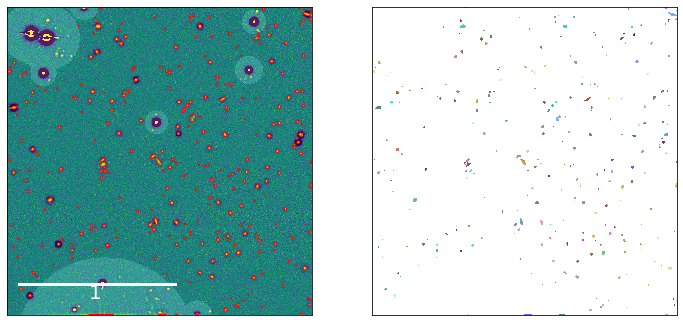

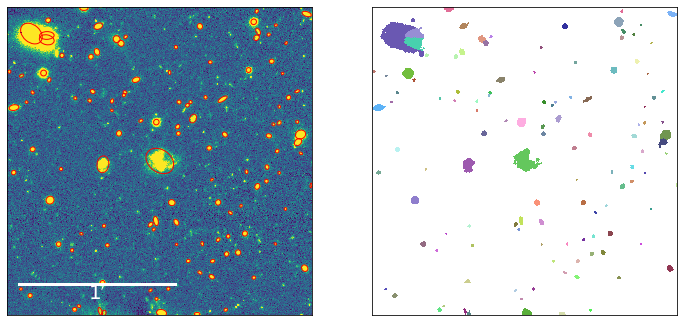

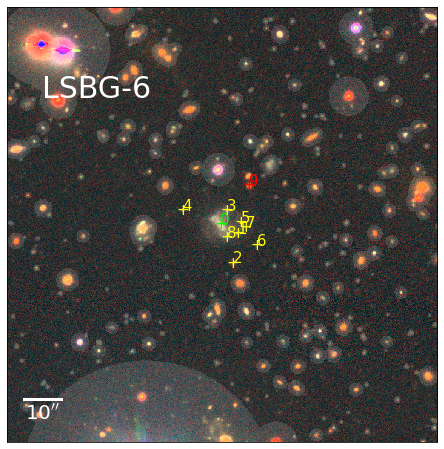

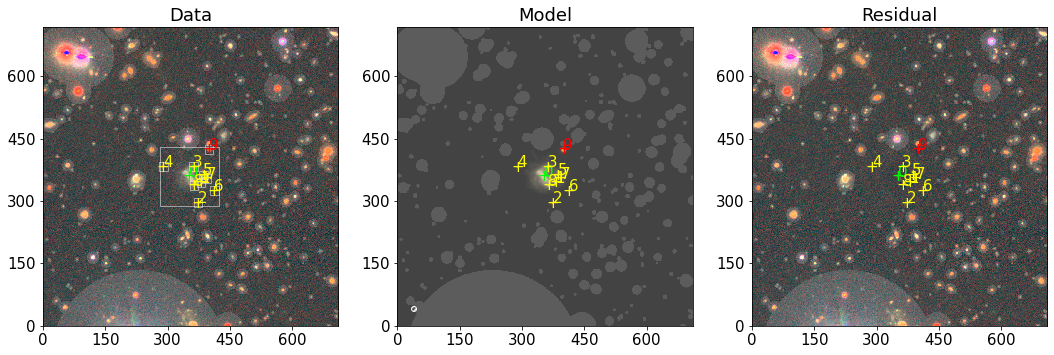

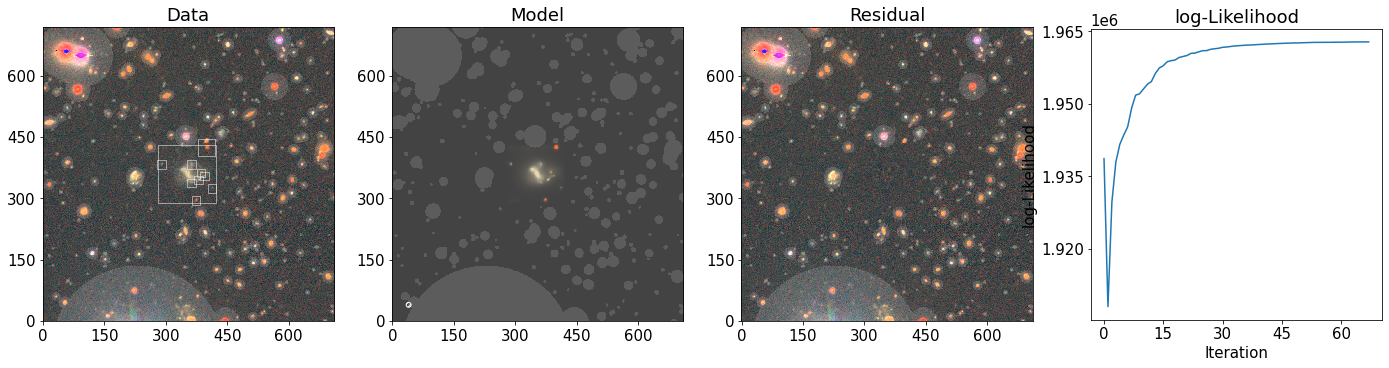

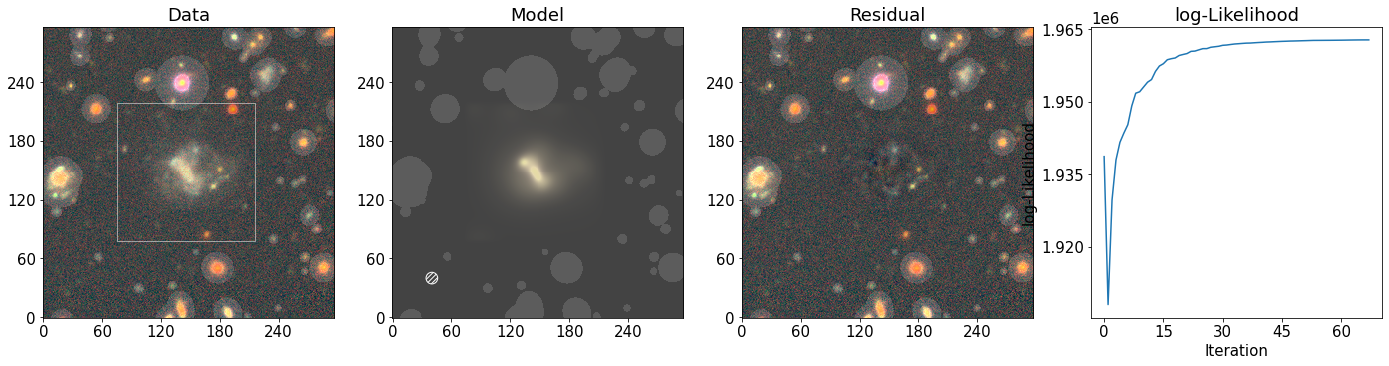

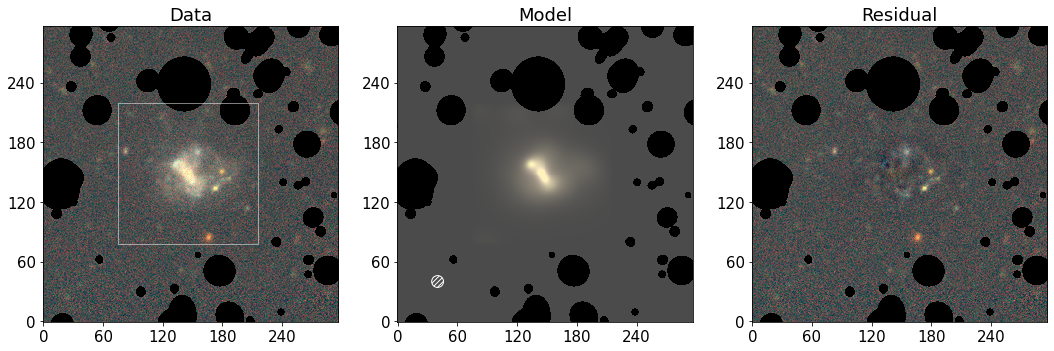

In [55]:
index = 5
blend = fitting_wavelet_observation(
    lsbg_cat[index],
    s18a,
    cutout_halfsize=1,
    starlet_thresh=2,
    prefix='LSBG',
    show_figure=True)

In [23]:
import dill

In [24]:
with open(f"./Models/LSBG-0004-trained-model-wavelet.df", "rb") as fp:
    blend, info, mask = dill.load(fp)
    fp.close()

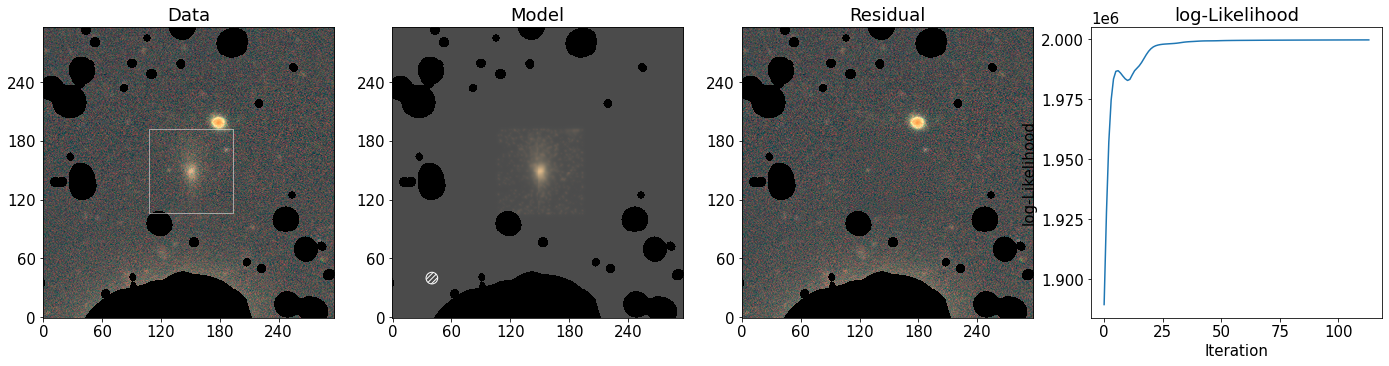

In [23]:
fig = kz.display.display_scarlet_model(
        blend,
        show_ind=info['sed_ind'],
        zoomin_size=50,
        minimum=-0.3,
        stretch=1,
        Q=1,
        channels='griz',
        show_loss=True,
        show_mask=True,
        show_mark=False,
        scale_bar=False)

In [44]:
import os

In [49]:
def multiprocess_fitting(index):
    if not os.path.isfile(f'./Models/LSBG-{lsbg_cat[index]["Seq"]:04d}-trained-model-wavelet.df'): 
        fitting_wavelet_observation(lsbg_cat[index], s18a, starlet_thresh=0.5)
    
from multiprocessing import Pool, Manager
from functools import partial

print('Number of processor to use:')
n_jobs = 5
manager = Manager()
pool = Pool(n_jobs)

#measurement_cat = manager.dict()
iterable = np.arange(0, 50, 1) # np.random.randint(0, len(lsbg_cat), 50)

#func = partial(fitting_single_comp, s18a)
pool.map(multiprocess_fitting, iterable)
pool.close()
pool.join()

# Will dgenerate cutouts for a list of filters: ['g', 'r', 'i', 'z']
# Read in saved FITS file: ./Images/LSBG_0045_img_g.fits
# Read in saved FITS file: ./Images/LSBG_0045_img_r.fits
# Read in saved FITS file: ./Images/LSBG_0045_img_i.fits
# Read in saved FITS file: ./Images/LSBG_0045_img_z.fits
# Will dgenerate cutouts for a list of filters: ['g', 'r', 'i', 'z']
# Read in saved FITS file: ./PSFs/LSBG_0045_psf_g.fits
# Read in saved FITS file: ./PSFs/LSBG_0045_psf_r.fits
# Read in saved FITS file: ./PSFs/LSBG_0045_psf_i.fits
# Read in saved FITS file: ./PSFs/LSBG_0045_psf_z.fits
# Query GAIA stars...
# 6 stars from GAIA are masked!
# Detected 232 objects
# 6 stars from GAIA are masked!
# Detected 255 objects
# Detected 85 objects
# min_grad = -0.30, contam_ratio = 0.01. starlet_thresh = 0.50.
  - Succeed for e_rel = 1e-4 with 18 iterations! Try higher accuracy!
  - Succeed for e_rel = 1e-4 with 16 iterations! Try higher accuracy!
Scarlet ran for 34 iterations to logL = 2064832.45547482